# Multiple Linear Regression

### Problem Statement :
#### Predicting the selling price of the vehicle using factors like Name of the vehicle, model year, kilometers driven etc

#### 1. Reading the data

In [166]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import seaborn as sns

In [167]:
data = pd.read_csv("C:/Users/goods/Desktop/archive/car_data.csv")

In [168]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [169]:
data.shape

(301, 9)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [171]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Check for null values

In [172]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## As we can see that there are multiple categorical columns, we need to convert them into numerical values so that the algorithm understands the input.

In [173]:
data = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first= True)

In [174]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1


### Finding correlations

<AxesSubplot:>

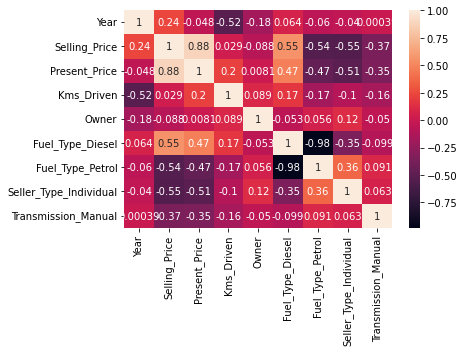

In [178]:
sns.heatmap(data.corr(), annot =True)

### Data preparation

In [186]:
data.drop('Car_Name', axis = 1 , inplace=True)

In [187]:
X = data.drop(['Selling_Price'], axis =1)
y = data['Selling_Price']

In [188]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state= 69)

## Building a linear model
#### We need to use stats module to add constants to work with multiple linear model

In [189]:
model = LinearRegression()

In [190]:
model.fit(X_train, y_train)

LinearRegression()

In [195]:
 model.predict(X_test)

array([ 8.75546839,  1.40709801,  8.86480317,  3.36134819,  4.58552259,
        4.22346569,  3.40832944,  5.17293621,  0.78100477,  2.39142373,
        7.65812102, -0.76677681,  0.47851848,  8.05352534,  4.34233501,
        3.11101569,  3.48800754, 10.16819539,  0.9249392 , 10.2374678 ,
        5.35337763,  1.28731023,  0.24046127,  2.55973144,  6.28662859,
        0.93716393,  2.42973173,  2.18696527,  2.73185049,  5.58369515,
        8.23606667,  4.36227157,  1.71079554,  6.40884373,  9.32327953,
        3.70226967,  4.20585109,  1.52739118,  6.7689679 ,  6.96819021,
        9.4823429 ,  0.32412197,  5.91794909,  6.4262043 ,  0.84721829,
        6.71623743,  5.43787554,  7.70138663,  4.40087714,  1.43981692,
        5.01491521,  0.94760976,  4.74213055,  1.59412008,  7.23958004,
        4.25423071,  3.51036796,  7.66447495, 20.25146281,  3.7220512 ,
        1.89472131])

In [198]:
model.score(X_test,y_test)

0.8841466697809925